In [572]:
# Importing dependencies
import sys
import os
sys.path.append(os.path.abspath(os.path.join(globals()['_dh'][0], '..')))

import numpy as np
#import control as ctrl
#import time

#from scipy.io import loadmat
#from scipy.fft import fft, fftfreq, fftshift
#from scipy.signal import lfilter
from matplotlib import pyplot as plt
from analysis import *
from modelling import *
from HelpFunc import *

In [573]:
# Importing the data
data = mat2np("DataForLabs/projectData24.mat")
year, month, day, hour = [], [], [], []
shortwaveRad = []
netRad = []
heatFlux = []
airTemp = []

for line in data:
    year.append(line[0])
    month.append(line[1])
    day.append(line[2])
    hour.append(line[3])
    shortwaveRad.append(line[4])
    netRad.append(line[5])
    heatFlux.append(line[6])
    airTemp.append(line[7])

year = np.array(year)
month = np.array(month)
day = np.array(day)
hour = np.array(hour)
shortwaveRad = np.array(shortwaveRad)
netRad = np.array(netRad)
heatFlux = np.array(heatFlux)
airTemp = np.array(airTemp)

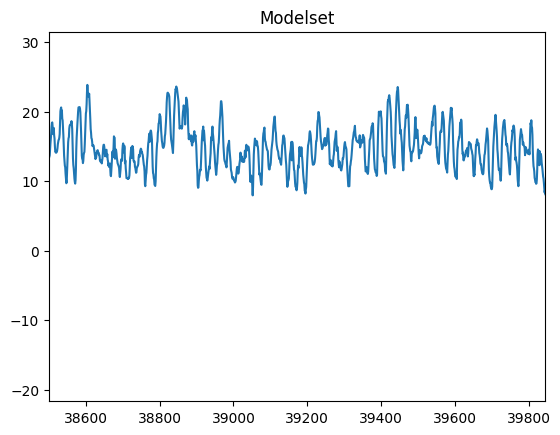

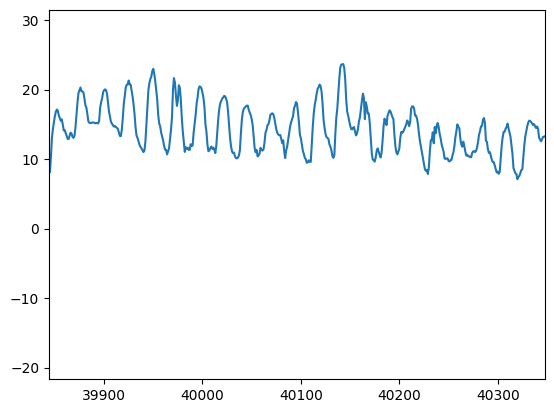

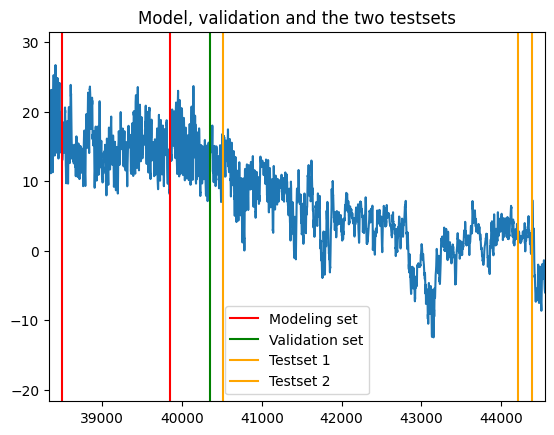

44212


In [574]:
# Choosing the model, validation and testset
plt.figure(1)
plt.title("Modelset")
plt.plot(airTemp)
interval = 8*7*24
init = 38500
nbrWeeksValid = 3
test2Start = 26


modelEnd = init + interval
validEnd = init + interval + nbrWeeksValid * 7 * 24
testEnd1 = init + interval + (nbrWeeksValid+1) * 7 * 24
testStart2 = init+interval+test2Start*7*24
testEnd2 = init+interval+(test2Start+1)*7*24


plt.xlim([init,init+interval])

modelData = airTemp[init:modelEnd]
validData = airTemp[modelEnd:validEnd]
testData1 = airTemp[validEnd:testEnd1]

modelDataInputNetRad = netRad[init:init+interval]
validDataInputNetRad = netRad[init+interval:init+interval+nbrWeeksValid*7*24]
testDataInputNetRad = netRad[init+interval+3*7*24:init+interval+4*7*24]

modelDataInputHeatFlux = heatFlux[init:init+interval]
validDataInputHeatFlux = heatFlux[init+interval:init+interval+nbrWeeksValid*7*24]
testDataInputHeatFlux = heatFlux[init+interval+3*7*24:init+interval+4*7*24]

modelDataInputShortwaveRad = shortwaveRad[init:init+interval]
validDataInputShortwaveRad  = shortwaveRad[init+interval:init+interval+nbrWeeksValid*7*24]
testDataInputShortwaveRad  = shortwaveRad[init+interval+3*7*24:init+interval+4*7*24]

testData2 = airTemp[testStart2:testEnd2]

plt.figure(2)
plt.plot(airTemp)
plt.xlim([init+interval,init+interval+nbrWeeksValid*7*24])
plt.show()

plt.figure(3)
plt.plot(airTemp)
plt.axvline(init, color="r", label="Modeling set")
plt.axvline(init+interval, color="r")
plt.axvline(init+interval+nbrWeeksValid*7*24, color="g", label = "Validation set")
plt.axvline(init+interval+(nbrWeeksValid+1)*7*24, color="orange", label = "Testset 1")
plt.axvline(init+interval+(test2Start+1)*7*24, color="orange", label = "Testset 2")
plt.axvline(init+interval+(test2Start)*7*24, color="orange")
plt.xlim([init-24*7, init+interval+(test2Start+2)*7*24])
plt.title("Model, validation and the two testsets")
plt.legend()

plt.show()
print(init+interval+(test2Start)*7*24)

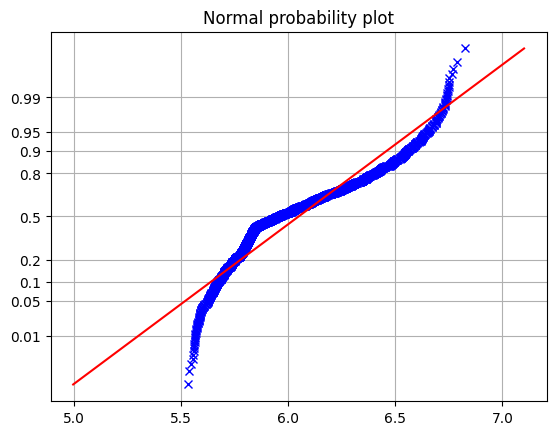

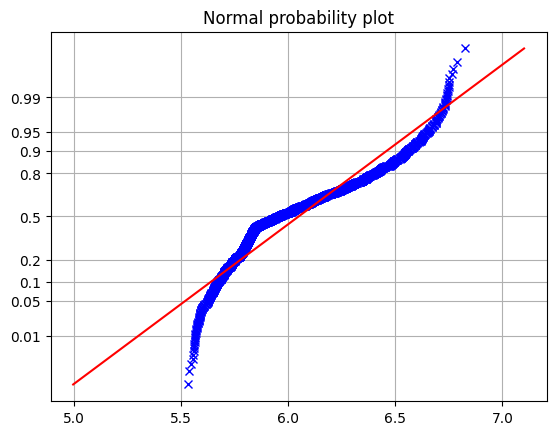

Discrete-time ARMA model: A(z)y(t) = C(z)e(t)

A(z) = 1.0 - 0.7857(±0.0171)·z⁻¹ - 0.1779(±0.0223)·z⁻²² - 0.0456(±0.0358)·z⁻²³ - 0.1366(±0.0391)·z⁻²⁴ + 0.041(±0.0385)·z⁻²⁵ + 0.029(±0.0358)·z⁻²⁶ + 0.0757(±0.0223)·z⁻²⁷
C(z) = 1.0 - 0.0489(±0.0164)·z⁻²⁴

Polynomial orders: nA = 27    nC = 24
Number of free coefficients: 8
Fit to estimation data (NRMSE): 70.62%
FPE : 0.01  MSE : 0.01
AIC : -2378.515   BIC : -2337.05



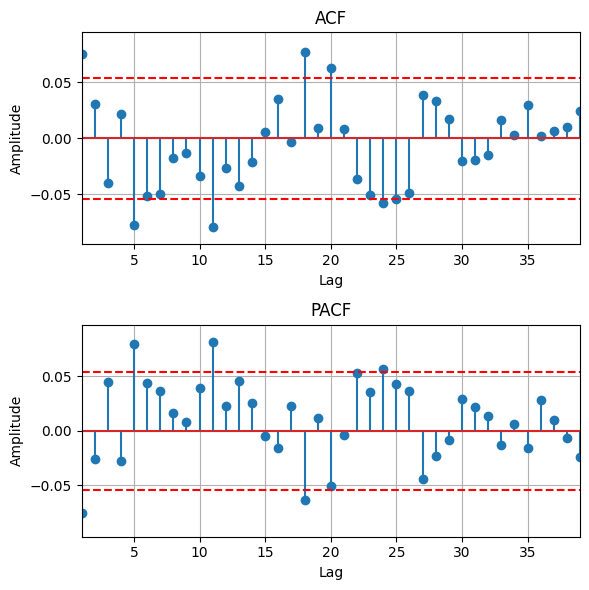

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: False (white if 56.11 < 31.41)
  McLeod-Li test:        False (white if 142.54 < 31.41)
  Monti test:            False (white if 50.55 < 31.41)
  Sign change test:      False (white if 0.39 in [0.47,0.53])


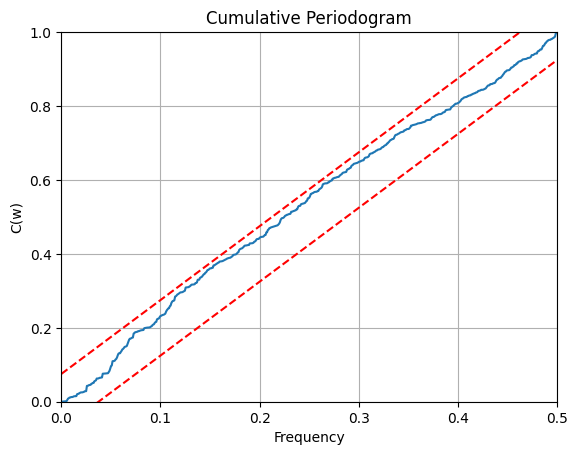

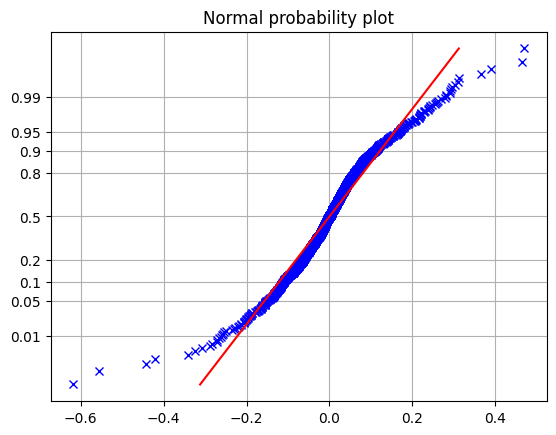

In [ ]:
# Box Jenkins - Step 1: Finding the A3 and C3 polynomials
def transform(data, reverse):
    if reverse:
        #x = filter([1] + [0]*(24-1) + [1], [1], data, axis=0, remove=True)
        x = np.exp(data) - 350
        
    else:
        x = np.log(data+350)
        #x = filter([1] + [0]*(24-1) + [-1], [1], x, axis=0, remove=True)
    return x

x = transform(modelDataInputNetRad, reverse = False)


y = modelData
s = 24

A3 = [1, 1] 
C3 = [1]

#A3 = np.convolve(A3, [1, -1])

A3 = np.convolve(A3,  [1] + [0]*(s-3) + 5*[-1] )
C3 = np.convolve(C3, [1] + [0]*(s-1) + [-1] )

modelX = estimateARMA(x, A=A3, C=C3, noLags=40)
normplot(modelX.resid)

White noise variance: 0.14268610012473354
Variance of original signal: 21307.088083860857
Variance of prediction residual: 14055.518521853202
Ammount of signal that was predicted: 34.03360202701929 %
Naive variation: 45969.86810748142
Ammount predicted by naive: -115.74918133605263 %


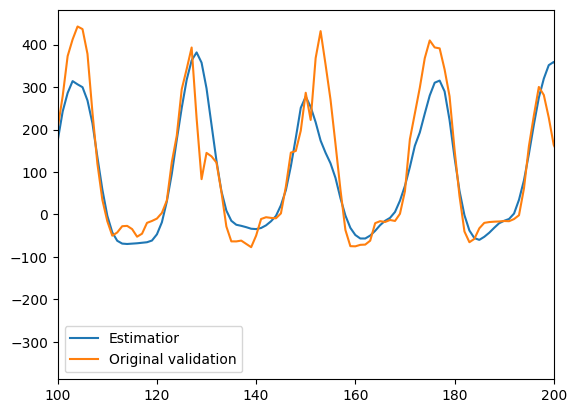

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: False (white if 2929.00 < 31.41)
  McLeod-Li test:        False (white if 2243.99 < 31.41)
  Monti test:            False (white if 456.67 < 31.41)
  Sign change test:      False (white if 0.18 in [0.46,0.54])


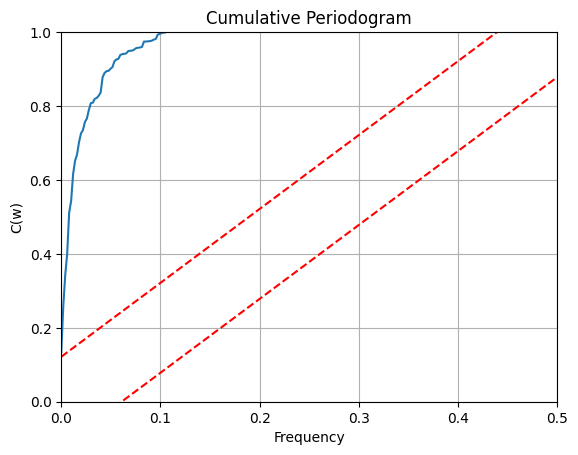

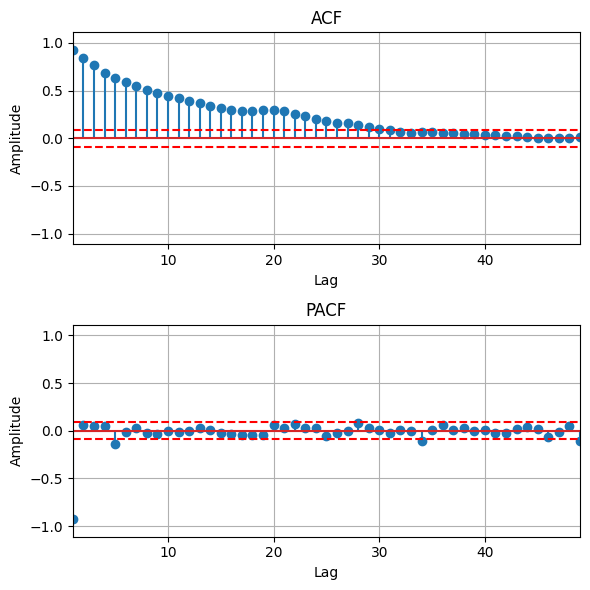

In [576]:
# Sidestep - Predicting X
# Performing some k-step predictions 

k = 18

A = modelX.A
C = modelX.C

def naive_pred(data, data_ind_start, k_step, season_k=None):
    """
    Computes the naive k-step predictor for the given data. If the optional
    parameter `season_k` is provided, the prediction is based on the corresponding
    value from the last season. Otherwise, it is based on the current value.
    
    Parameters:
        data (array-like): The input time-series data.
        data_ind (array-like): Indices of the data used to compute the variance.
        k_step (int): The number of steps ahead for the naive prediction.
        season_k (int, optional): Seasonal lag, if applicable.
        
    Returns:
        tuple:
            naive_pred (numpy.ndarray): The naive predictions for the indices specified in `data_ind`.
            var_naive (float): The variance of the prediction residuals.
            ehat (numpy.ndarray): The prediction residuals.
    """
    # Ensure data is a numpy array and reshape to a column vector
    data = np.array(data).reshape(-1)
    
    # Compute naive predictor
    if season_k is None:
        naive_pred_full = np.concatenate((np.zeros(k_step), data[:-k_step]))
    else:
        naive_pred_full = np.concatenate((np.zeros(season_k + k_step), data[:-(season_k + k_step)]))
    
    # Retain only relevant indices
    naive_pred = naive_pred_full[data_ind_start:]
    
    # Compute prediction residuals and variance
    ehat = data[data_ind_start:] - naive_pred
    var_naive = np.var(ehat)
    
    return naive_pred, var_naive, ehat

def k_predictor(C, A, k, data, validStart):

    Fk, Gk = polydiv(C, A, k)

    yhat_k = filter(Gk, C, data, axis=0)

    return Fk, yhat_k

data = transform(validDataInputNetRad, reverse=False)

omit_samples = 0

f1, y1k = k_predictor(C, A, 1, data, 0)
sig2 = data[omit_samples:] - y1k[omit_samples:]
sig2 = np.var(sig2)
print("White noise variance: " + str(sig2))

fk, yhat_k = k_predictor(C, A, k, data, 0)
#yhat_k = np.exp(yhat_k)
yhat_k = transform(yhat_k, reverse=True)

data = validDataInputNetRad

err = data[omit_samples:] - yhat_k[omit_samples:]
naive, var_naive, ehat = naive_pred(data, 0, k)


varek = np.var(err)
print("Variance of original signal: " + str(np.var(data)))
print("Variance of prediction residual: " + str(np.var(err)))
print("Ammount of signal that was predicted: " + str((1 - np.var(err)/np.var(data))*100) + " %")
print("Naive variation: " + str(var_naive))
print("Ammount predicted by naive: " + str((1 - var_naive/np.var(data))*100) + " %")

plt.figure(1)
plt.plot(yhat_k, label="Estimatior")
plt.plot(data, label="Original validation")
#plt.plot(naive, label="Naive predictor")
plt.xlim([100, 200])
plt.legend()

plt.show()
whiteness_test(err)
estimateARMA(err, A=0, C=0, noLags=50)

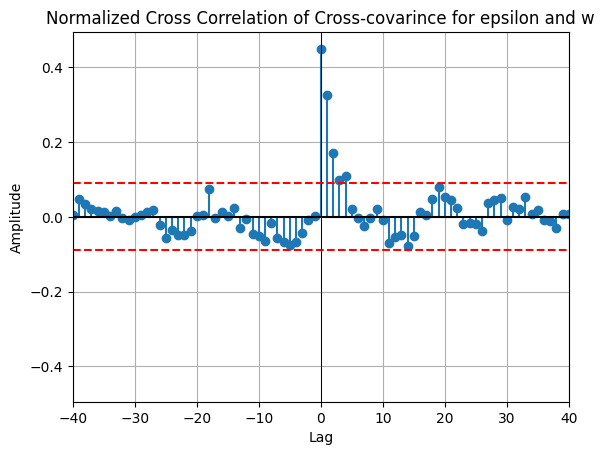

1344
1344
Discrete-time BJ model: y(t) = [B(z)/F(z)]x(t) + e(t)

B(z) = 1.2508(±0.1705)
F(z) = 1.0 - 0.492(±0.0693)·z⁻¹

Polynomial orders: nB = 0    nF = 1
Number of free coefficients: 2
Fit to estimation data (NRMSE): 15.21%
FPE : 6.801  MSE : 6.786
AIC : 6391.636   BIC : 6402.043



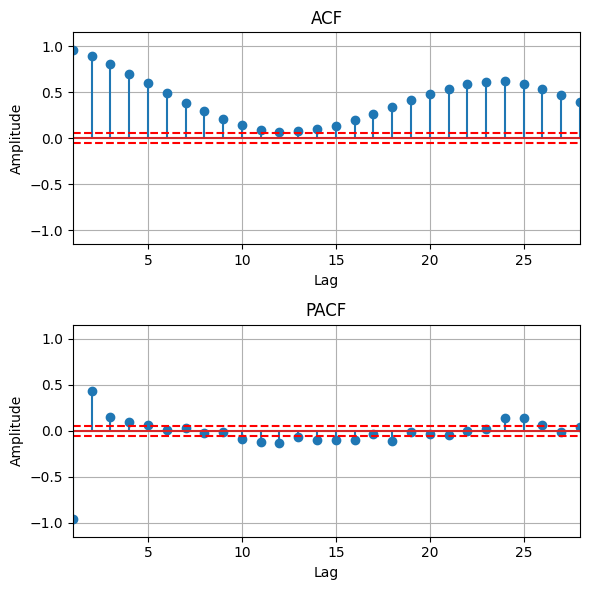

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: False (white if 5989.65 < 31.41)
  McLeod-Li test:        False (white if 3388.73 < 31.41)
  Monti test:            False (white if 1673.53 < 31.41)
  Sign change test:      False (white if 0.06 in [0.47,0.53])


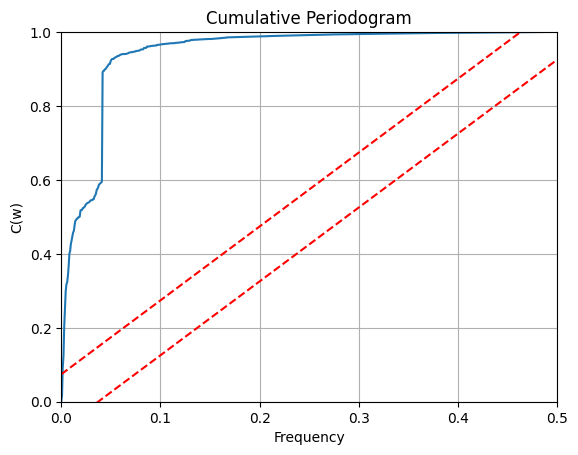

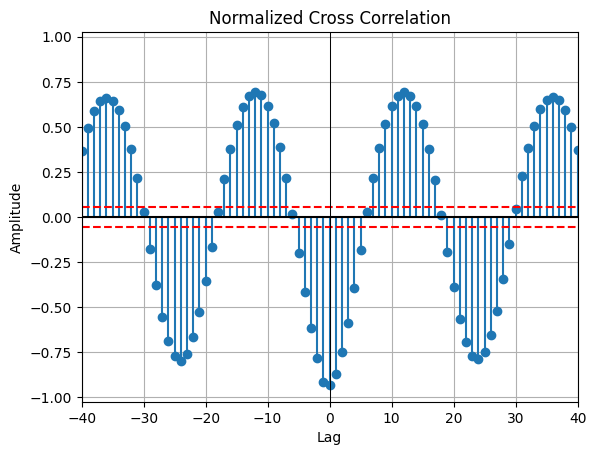

In [582]:
# Box Jenkins - Step 2: Finding the B and A2 polynomial
A3 = modelX.A
C3 = modelX.C

x = transform(modelDataInputNetRad, reverse = False)
#x = modelDataInputNetRad
y = modelData
#y = transform(modelData, reverse=False)

w = filter(A3, C3, x, remove=True, axis=0)
eps = filter(A3, C3, y, remove=True, axis=0)
M = 40
ccf(w, eps, numLags=M,N=499, titleStr="Cross-covarince for epsilon and w")
d = 0; r = 1; s = 0
A2 = np.array([1] * (r+1))
B = np.array([1]*(s+1))

# B = np.convolve(B, [1] + 23*[0] + [-1])

print(len(y))
print(len(x))

Mba2 = estimateBJ(y, x, B=B, d=d, A2 = A2, C1 = [1], A1 = [1])
A2 = Mba2.F
B = Mba2.B

e_est = filter([1], [1], y, remove=len(A2)-r+d+s, axis=0) - np.exp( filter(B, A2, x, axis=0, remove=True) ) 

e_hat = Mba2.resid
ccf(x, e_est, numLags = M)

#plt.plot(e_hat)
#plt.plot(y - filter(B, A2, x, axis=0))
#plt.legend()
#plt.show()

Discrete-time BJ model: y(t) = [B(z)/F(z)]x(t) + [C(z)/D(z)]e(t)

B(z) = 3.1896(±0.1195)
C(z) = 1.0 - 0.0193(±0.0276)·z⁻¹¹
D(z) = 1.0 - 1.2638(±0.0263)·z⁻¹ + 0.3004(±0.0263)·z⁻² - 0.1679(±0.0273)·z⁻²³ + 0.0177(±0.0456)·z⁻²⁴ + 0.1273(±0.0445)·z⁻²⁵ - 0.0137(±0.0236)·z⁻²⁶
F(z) = 1.0 - 0.62(±0.021)·z⁻¹

Polynomial orders: nB = 0    nC = 11    nD = 26    nF = 1
Number of free coefficients: 9
Fit to estimation data (NRMSE): 84.27%
FPE : 0.237  MSE : 0.234
AIC : 1842.132   BIC : 1888.787



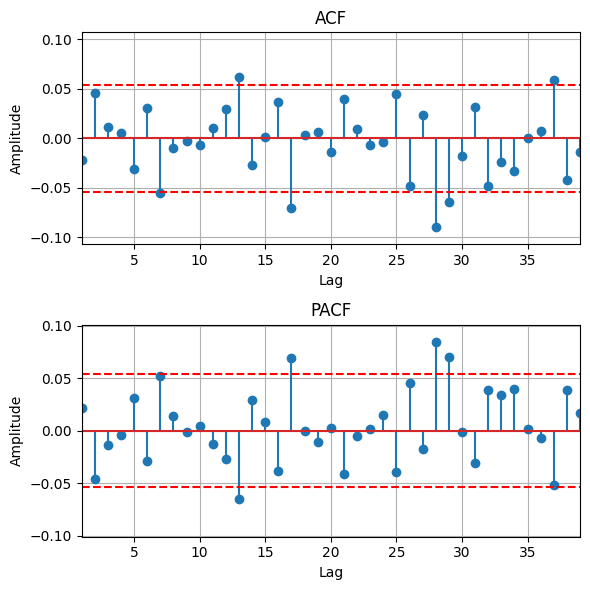

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 26.56 < 31.41)
  McLeod-Li test:        False (white if 127.08 < 31.41)
  Monti test:            True (white if 26.57 < 31.41)
  Sign change test:      False (white if 0.46 in [0.47,0.53])


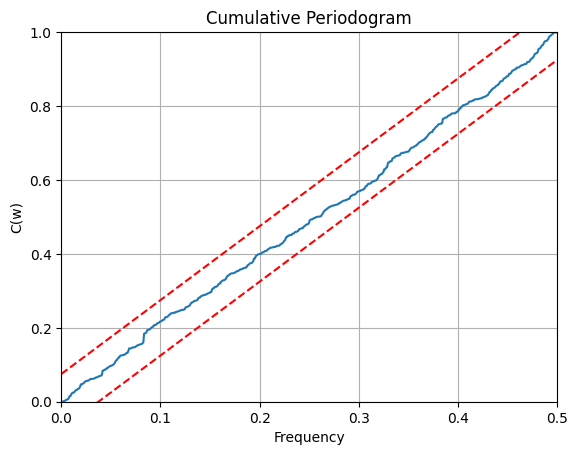

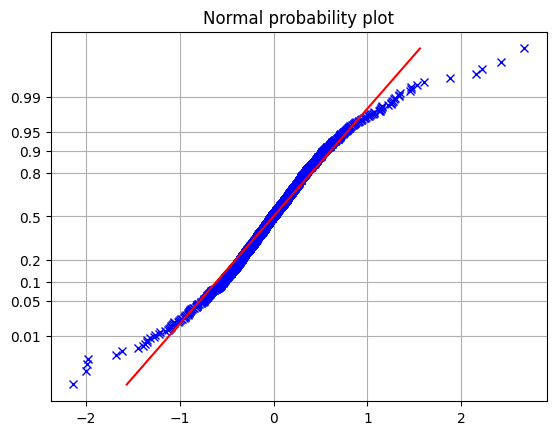

In [583]:
# Box Jenkins - Step 3: Finding the A1 and C1 polynomials
A1 = [1, 1, 1]
C1 = [1] + [0]*10 + [1]

A1 = np.convolve(A1, [1] + [0]*22 + 2*[-1])
#C1 = np.convolve(C1, [1] + [0]*22 + 3*[-1])

#e = estimateARMA(e_est, A=len(A1)-1, C = len(C1)-1, A_free=A1, C_free=C1)
#normplot(e.resid)
final_e_est = estimateBJ(y, x, A1=len(A1)-1,A2=len(A2)-1, C1=len(C1)-1, 
                         B = B, A1_free=A1, A2_free=A2, C1_free=C1, noLags=40, d=0)
normplot(final_e_est.resid)



White noise variance: 0.09181220733271804
Original signal variation: 0.9274807787698413
Variance of prediction residual: 1.6159711691568652
Ammount of signal that was predicted: -74.23230822100693 %
Naive variation: 0.4313416099773242
Ammount predicted by naive: 53.493202247335894 %


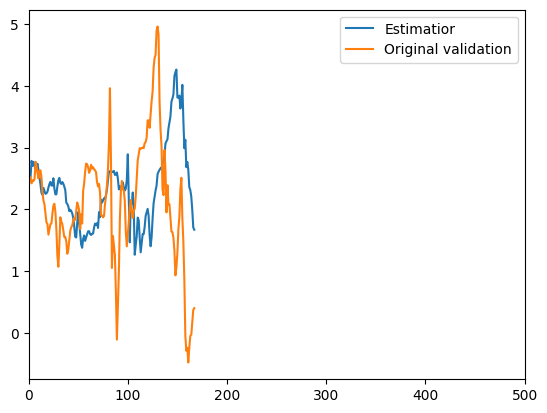

In [587]:
# Step 4: Predictions using the Box Jenkins model
def predict_boxjenkins(C1, A1, B, A2, k, validDataY, validDataX, data_ind):
    
    Ka = np.convolve(A1, A2)
    Kb = np.convolve(A1, B)
    Kc = np.convolve(A2, C1)
    
    Fk, Gk = polydiv(Kc, Ka, k)
    Kb_Fk = np.convolve(Kb, Fk)
    Fk_hat, Gk_hat = polydiv(Kb_Fk, Kc, k)
    
    xhat = filter(Gk, Kc, validDataX, axis=0, remove=len(Gk))
    yhat = filter(Fk_hat, [1], xhat, axis=0) + filter(Gk_hat, Kc, validDataX, axis=0, remove=len(Gk)) + filter(Gk, Kc, validDataY, axis=0, remove=len(Gk))

    Fk_hat, Gk_hat = polydiv(Kb_Fk, Kc, 1)
    

    yerr = yhat - validDataY[len(Gk):]
       
    yhat = yhat[data_ind - len(Gk):]
    yerr = yerr[data_ind - len(Gk):]

    return yhat, yerr

def naive_pred(data, data_ind_start, k_step, season_k=None):
    """
    Computes the naive k-step predictor for the given data. If the optional
    parameter `season_k` is provided, the prediction is based on the corresponding
    value from the last season. Otherwise, it is based on the current value.
    
    Parameters:
        data (array-like): The input time-series data.
        data_ind (array-like): Indices of the data used to compute the variance.
        k_step (int): The number of steps ahead for the naive prediction.
        season_k (int, optional): Seasonal lag, if applicable.
        
    Returns:
        tuple:
            naive_pred (numpy.ndarray): The naive predictions for the indices specified in `data_ind`.
            var_naive (float): The variance of the prediction residuals.
            ehat (numpy.ndarray): The prediction residuals.
    """
    # Ensure data is a numpy array and reshape to a column vector
    data = np.array(data).reshape(-1)
    
    # Compute naive predictor
    if season_k is None:
        naive_pred_full = np.concatenate((np.zeros(k_step), data[:-k_step]))
    else:
        naive_pred_full = np.concatenate((np.zeros(season_k + k_step), data[:-(season_k + k_step)]))
    
    # Retain only relevant indices
    naive_pred = naive_pred_full[data_ind_start:]
    
    # Compute prediction residuals and variance
    ehat = data[data_ind_start:] - naive_pred
    var_naive = np.var(ehat)
    
    return naive_pred, var_naive, ehat

A1 = final_e_est.D
C = final_e_est.C
B = final_e_est.B
A2 = final_e_est.F

k = 18

data_ind = 100

# Validation set:
validData = airTemp[modelEnd-data_ind:validEnd]
validDataInputNetRad = netRad[modelEnd-data_ind:validEnd]
validDataInputNetRad = transform(validDataInputNetRad, reverse=False)

# Defining test sets
#validData = airTemp[validEnd-data_ind+24: testEnd1]
#validDataInputNetRad = transform(netRad[validEnd-data_ind : testEnd1], reverse=False)

validData = airTemp[testStart2-data_ind: testEnd2]
validDataInputNetRad = transform(netRad[testStart2-data_ind : testEnd2], reverse=False)

yhat, err = predict_boxjenkins(C, A1, B, A2, k, validData, validDataInputNetRad, data_ind)
naive_pres, naiveVar, ehas = naive_pred(validData,data_ind, 3, 0)
t, var = predict_boxjenkins(C, A1, B, A2, 1, validData, validDataInputNetRad, data_ind)

def compare_predictions(orgData, predData, predError, sig2, naiveData, naiveVar, data_ind, xlim = None):

    print("White noise variance: " + str(sig2))
    print("Original signal variation: " + str(np.var(orgData[data_ind:])))

    print("Variance of prediction residual: " + str(np.var(predError)))
    print("Ammount of signal that was predicted: " + str((1 - np.var(predError)/np.var(orgData[data_ind:]))*100) + " %")
    print("Naive variation: " + str(naiveVar))
    print("Ammount predicted by naive: " + str((1 - naiveVar/np.var(orgData[data_ind:]))*100) + " %")

    
    plt.figure(1)
    plt.plot(predData, label="Estimatior")
    plt.plot(orgData[data_ind:], label="Original validation")
    #plt.plot(naiveData, label="Naive predictor")
    #plt.plot(0.01 * validDataInputNetRad[data_ind:], label="Input")
    plt.xlim([0,500])
    plt.legend()
    plt.show()

compare_predictions(validData, yhat, err, np.var(var), naive_pres, naiveVar, data_ind)